In [486]:
import pandas as pd
import numpy as np
pd.pandas.set_option('display.max_columns', None)

In [487]:
df=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [488]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [489]:
df.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [490]:
counts = df['HomePlanet'].value_counts()

df['HomePlanet'].fillna(pd.Series(np.random.choice(counts.index, size=len(df.index), p=counts/sum(counts))), inplace=True)

counts = df_test['HomePlanet'].value_counts()

df_test['HomePlanet'].fillna(pd.Series(np.random.choice(counts.index, size=len(df_test.index), p=counts/sum(counts))), inplace=True)

In [491]:
df.HomePlanet.value_counts()

Earth     4710
Europa    2186
Mars      1797
Name: HomePlanet, dtype: int64

In [492]:
df = pd.get_dummies(df, columns = ["HomePlanet"])
df_test = pd.get_dummies(df_test, columns = ["HomePlanet"])

In [493]:
df.isnull().sum()

PassengerId            0
CryoSleep            217
Cabin                199
Destination          182
Age                  179
VIP                  203
RoomService          181
FoodCourt            183
ShoppingMall         208
Spa                  183
VRDeck               188
Name                 200
Transported            0
HomePlanet_Earth       0
HomePlanet_Europa      0
HomePlanet_Mars        0
dtype: int64

In [494]:
# Null değerlere sahip satırlarda CryoSleep değeri True ise o null değerlerini 0 ile doldur
df.loc[(df['RoomService'].isnull()) & (df['CryoSleep'] == True), 'RoomService'] = 0
df.loc[(df['FoodCourt'].isnull()) & (df['CryoSleep'] == True), 'FoodCourt'] = 0
df.loc[(df['ShoppingMall'].isnull()) & (df['CryoSleep'] == True), 'ShoppingMall'] = 0
df.loc[(df['Spa'].isnull()) & (df['CryoSleep'] == True), 'Spa'] = 0
df.loc[(df['VRDeck'].isnull()) & (df['CryoSleep'] == True), 'VRDeck'] = 0

In [495]:
df_test.loc[(df_test['RoomService'].isnull()) & (df_test['CryoSleep'] == True), 'RoomService'] = 0
df_test.loc[(df_test['FoodCourt'].isnull()) & (df_test['CryoSleep'] == True), 'FoodCourt'] = 0
df_test.loc[(df_test['ShoppingMall'].isnull()) & (df_test['CryoSleep'] == True), 'ShoppingMall'] = 0
df_test.loc[(df_test['Spa'].isnull()) & (df_test['CryoSleep'] == True), 'Spa'] = 0
df_test.loc[(df_test['VRDeck'].isnull()) & (df_test['CryoSleep'] == True), 'VRDeck'] = 0

In [496]:
null_mask = df['RoomService'].isnull()
zero_mask = ((df['FoodCourt'] == 0) & (df['ShoppingMall'] == 0) & (df['Spa'] == 0) & (df['VRDeck'] == 0))
df.loc[null_mask & zero_mask, 'RoomService'] = 0

null_mask = df['FoodCourt'].isnull()
zero_mask = ((df['RoomService'] == 0) & (df['ShoppingMall'] == 0) & (df['Spa'] == 0) & (df['VRDeck'] == 0))
df.loc[null_mask & zero_mask, 'FoodCourt'] = 0

null_mask = df['ShoppingMall'].isnull()
zero_mask = ((df['FoodCourt'] == 0) & (df['RoomService'] == 0) & (df['Spa'] == 0) & (df['VRDeck'] == 0))
df.loc[null_mask & zero_mask, 'ShoppingMall'] = 0

null_mask = df['Spa'].isnull()
zero_mask = ((df['FoodCourt'] == 0) & (df['ShoppingMall'] == 0) & (df['RoomService'] == 0) & (df['VRDeck'] == 0))
df.loc[null_mask & zero_mask, 'Spa'] = 0

In [497]:
null_mask = df['VRDeck'].isnull()
zero_mask = ((df['FoodCourt'] == 0) & (df['ShoppingMall'] == 0) & (df['Spa'] == 0) & (df['RoomService'] == 0))
df.loc[null_mask & zero_mask, 'VRDeck'] = 0

In [498]:
#-----------------------------
null_mask = df_test['RoomService'].isnull()
zero_mask = ((df_test['FoodCourt'] == 0) & (df_test['ShoppingMall'] == 0) & (df_test['Spa'] == 0) & (df_test['VRDeck'] == 0))
df_test.loc[null_mask & zero_mask, 'RoomService'] = 0

In [499]:
null_mask = df_test['FoodCourt'].isnull()
zero_mask = ((df_test['RoomService'] == 0) & (df_test['ShoppingMall'] == 0) & (df_test['Spa'] == 0) & (df_test['VRDeck'] == 0))
df_test.loc[null_mask & zero_mask, 'FoodCourt'] = 0

In [500]:
null_mask = df_test['ShoppingMall'].isnull()
zero_mask = ((df_test['FoodCourt'] == 0) & (df_test['RoomService'] == 0) & (df_test['Spa'] == 0) & (df_test['VRDeck'] == 0))
df_test.loc[null_mask & zero_mask, 'ShoppingMall'] = 0

In [501]:
null_mask = df_test['Spa'].isnull()
zero_mask = ((df_test['FoodCourt'] == 0) & (df_test['ShoppingMall'] == 0) & (df_test['RoomService'] == 0) & (df_test['VRDeck'] == 0))
df_test.loc[null_mask & zero_mask, 'Spa'] = 0

null_mask = df_test['VRDeck'].isnull()
zero_mask = ((df_test['FoodCourt'] == 0) & (df_test['ShoppingMall'] == 0) & (df_test['Spa'] == 0) & (df_test['RoomService'] == 0))
df_test.loc[null_mask & zero_mask, 'VRDeck'] = 0

In [502]:
df.isnull().sum()

PassengerId            0
CryoSleep            217
Cabin                199
Destination          182
Age                  179
VIP                  203
RoomService          105
FoodCourt            105
ShoppingMall         101
Spa                  113
VRDeck               103
Name                 200
Transported            0
HomePlanet_Earth       0
HomePlanet_Europa      0
HomePlanet_Mars        0
dtype: int64

In [503]:
df[(df['RoomService'] == 0)].FoodCourt.mean()+df[(df['RoomService'] == 0)].ShoppingMall.mean()+df[(df['RoomService'] == 0)].Spa.mean()+df[(df['RoomService'] == 0)].VRDeck.mean()

1078.3798157654692

In [504]:
df[(df['FoodCourt'] == 0)].RoomService.mean()+df[(df['FoodCourt'] == 0)].ShoppingMall.mean()+df[(df['FoodCourt'] == 0)].Spa.mean()+df[(df['FoodCourt'] == 0)].VRDeck.mean()

479.70026811276193

In [505]:
df[(df['ShoppingMall'] == 0)].FoodCourt.mean()+df[(df['ShoppingMall'] == 0)].RoomService.mean()+df[(df['ShoppingMall'] == 0)].Spa.mean()+df[(df['ShoppingMall'] == 0)].VRDeck.mean()

1095.189010747596

In [506]:
df[(df['Spa'] == 0)].FoodCourt.mean()+df[(df['Spa'] == 0)].ShoppingMall.mean()+df[(df['Spa'] == 0)].RoomService.mean()+df[(df['Spa'] == 0)].VRDeck.mean()

496.71668688919533

In [507]:
df[(df['VRDeck'] == 0)].FoodCourt.mean()+df[(df['VRDeck'] == 0)].ShoppingMall.mean()+df[(df['VRDeck'] == 0)].Spa.mean()+df[(df['VRDeck'] == 0)].RoomService.mean()

541.1716253931638

In [508]:
null_rows_index = df[(df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck'] < 1078) & (df['RoomService'].isnull())].index
df.loc[null_rows_index, 'RoomService'] = 0

In [509]:
null_rows_index = df[(df['RoomService'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck'] < 479) & (df['FoodCourt'].isnull())].index
df.loc[null_rows_index, 'FoodCourt'] = 0

In [510]:
null_rows_index = df[(df['RoomService'] + df['FoodCourt'] + df['Spa'] + df['VRDeck'] < 1095) & (df['ShoppingMall'].isnull())].index
df.loc[null_rows_index, 'ShoppingMall'] = 0

In [511]:
null_rows_index = df[(df['FoodCourt'] + df['ShoppingMall'] + df['RoomService'] + df['VRDeck'] < 496) & (df['Spa'].isnull())].index
df.loc[null_rows_index, 'Spa'] = 0

In [512]:
null_rows_index = df[(df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['RoomService'] < 541) & (df['VRDeck'].isnull())].index
df.loc[null_rows_index, 'VRDeck'] = 0

In [513]:
df.isnull().sum()

PassengerId            0
CryoSleep            217
Cabin                199
Destination          182
Age                  179
VIP                  203
RoomService           48
FoodCourt             94
ShoppingMall          54
Spa                   96
VRDeck                83
Name                 200
Transported            0
HomePlanet_Earth       0
HomePlanet_Europa      0
HomePlanet_Mars        0
dtype: int64

In [514]:
print("Vıp=False ; Spa mean",df_test[df_test["VIP"]==False].Spa.mean())
print("\nVıp=True ; Spa mean",df_test[df_test["VIP"]==True].Spa.mean())

Vıp=False ; Spa mean 271.61964549483014

Vıp=True ; Spa mean 1403.8333333333333


In [515]:
df_test.loc[(df_test['Spa'].isnull()) & (df_test['VIP'] == False), 'Spa'] = 272
df_test.loc[(df_test['Spa'].isnull()) & (df_test['VIP'] == True), 'Spa'] = 1404

In [516]:
print("Vıp=False ; Spa mean",df[df["VIP"]==False].Spa.mean())
print("\nVıp=True ; Spa mean",df[df["VIP"]==True].Spa.mean())

Vıp=False ; Spa mean 298.58240819812124

Vıp=True ; Spa mean 756.8686868686868


In [517]:
df.loc[(df['Spa'].isnull()) & (df['VIP'] == False), 'Spa'] = 299
df.loc[(df['Spa'].isnull()) & (df['VIP'] == True), 'Spa'] = 757

In [518]:
print("Vıp=False ; VRDeck mean",df_test[df_test["VIP"]==False].VRDeck.mean())
print("\nVıp=True ; VRDeck mean",df_test[df_test["VIP"]==True].VRDeck.mean())

Vıp=False ; VRDeck mean 288.6087917485265

Vıp=True ; VRDeck mean 1115.5277777777778


In [519]:
df_test.loc[(df_test['VRDeck'].isnull()) & (df_test['VIP'] == False), 'VRDeck'] = 289
df_test.loc[(df_test['VRDeck'].isnull()) & (df_test['VIP'] == True), 'VRDeck'] = 1116

In [520]:
print("Vıp=False ; VRDeck mean",df[df["VIP"]==False].VRDeck.mean())
print("\nVıp=True ; VRDeck mean",df[df["VIP"]==True].VRDeck.mean())

Vıp=False ; VRDeck mean 279.17159907441237

Vıp=True ; VRDeck mean 1228.5561224489795


In [521]:
df.loc[(df['VRDeck'].isnull()) & (df['VIP'] == False), 'VRDeck'] = 279
df.loc[(df['VRDeck'].isnull()) & (df['VIP'] == True), 'VRDeck'] = 1229

In [522]:
print("Vıp=False ; ShoppingMall mean",df_test[df_test["VIP"]==False].ShoppingMall.mean())
print("\nVıp=True ; ShoppingMall mean",df_test[df_test["VIP"]==True].ShoppingMall.mean())

Vıp=False ; ShoppingMall mean 172.67793682132282

Vıp=True ; ShoppingMall mean 338.90410958904107


In [523]:
df_test.loc[(df_test['ShoppingMall'].isnull()) & (df_test['VIP'] == False), 'ShoppingMall'] = 173
df_test.loc[(df_test['ShoppingMall'].isnull()) & (df_test['VIP'] == True), 'ShoppingMall'] = 339

In [524]:
print("Vıp=False ; ShoppingMall mean",df[df["VIP"]==False].ShoppingMall.mean())
print("\nVıp=True ; ShoppingMall mean",df[df["VIP"]==True].ShoppingMall.mean())

Vıp=False ; ShoppingMall mean 170.67042697719555

Vıp=True ; ShoppingMall mean 247.72680412371133


In [525]:
df.loc[(df['ShoppingMall'].isnull()) & (df['VIP'] == False), 'ShoppingMall'] = 171
df.loc[(df['ShoppingMall'].isnull()) & (df['VIP'] == True), 'ShoppingMall'] = 248

In [526]:
print("Vıp=False ; RoomService mean",df_test[df_test["VIP"]==False].RoomService.mean())
print("\nVıp=True ; RoomService mean",df_test[df_test["VIP"]==True].RoomService.mean())

Vıp=False ; RoomService mean 214.3277476589453

Vıp=True ; RoomService mean 519.9054054054054


In [527]:
df_test.loc[(df_test['RoomService'].isnull()) & (df_test['VIP'] == False), 'RoomService'] = 214
df_test.loc[(df_test['RoomService'].isnull()) & (df_test['VIP'] == True), 'RoomService'] = 520

In [528]:
print("Vıp=False ; RoomService mean",df[df["VIP"]==False].RoomService.mean())
print("\nVıp=True ; RoomService mean",df[df["VIP"]==True].RoomService.mean())

Vıp=False ; RoomService mean 213.84671355808877

Vıp=True ; RoomService mean 471.19897959183675


In [529]:
df.loc[(df['RoomService'].isnull()) & (df['VIP'] == False), 'RoomService'] = 214
df.loc[(df['RoomService'].isnull()) & (df['VIP'] == True), 'RoomService'] = 471

In [530]:
print("Vıp=False ; FoodCourt mean",df_test[df_test["VIP"]==False].FoodCourt.mean())
print("\nVıp=True ; FoodCourt mean",df_test[df_test["VIP"]==True].FoodCourt.mean())

Vıp=False ; FoodCourt mean 401.60034602076126

Vıp=True ; FoodCourt mean 1747.3783783783783


In [531]:
df_test.loc[(df_test['FoodCourt'].isnull()) & (df_test['VIP'] == False), 'FoodCourt'] = 402
df_test.loc[(df_test['FoodCourt'].isnull()) & (df_test['VIP'] == True), 'FoodCourt'] = 1747

In [532]:
print("Vıp=False ; FoodCourt mean",df[df["VIP"]==False].FoodCourt.mean())
print("\nVıp=True ; FoodCourt mean",df[df["VIP"]==True].FoodCourt.mean())

Vıp=False ; FoodCourt mean 421.9188101913934

Vıp=True ; FoodCourt mean 1792.8153846153846


In [533]:
df.loc[(df['FoodCourt'].isnull()) & (df['VIP'] == False), 'FoodCourt'] = 422
df.loc[(df['FoodCourt'].isnull()) & (df['VIP'] == True), 'FoodCourt'] = 1793

In [534]:
df.isnull().sum()

PassengerId            0
CryoSleep            217
Cabin                199
Destination          182
Age                  179
VIP                  203
RoomService            0
FoodCourt              2
ShoppingMall           2
Spa                    1
VRDeck                 0
Name                 200
Transported            0
HomePlanet_Earth       0
HomePlanet_Europa      0
HomePlanet_Mars        0
dtype: int64

In [535]:
df['ShoppingMall'].fillna(df['ShoppingMall'].mean(), inplace=True)
df['Spa'].fillna(df['Spa'].mean(), inplace=True)
df['FoodCourt'].fillna(df['FoodCourt'].mean(), inplace=True)

In [536]:
df_test['ShoppingMall'].fillna(df_test['ShoppingMall'].mean(), inplace=True)
df_test['Spa'].fillna(df_test['Spa'].mean(), inplace=True)
df_test['FoodCourt'].fillna(df_test['FoodCourt'].mean(), inplace=True)
df_test['RoomService'].fillna(df_test['RoomService'].mean(), inplace=True)
df_test['VRDeck'].fillna(df_test['VRDeck'].mean(), inplace=True)

In [537]:
df.isnull().sum()

PassengerId            0
CryoSleep            217
Cabin                199
Destination          182
Age                  179
VIP                  203
RoomService            0
FoodCourt              0
ShoppingMall           0
Spa                    0
VRDeck                 0
Name                 200
Transported            0
HomePlanet_Earth       0
HomePlanet_Europa      0
HomePlanet_Mars        0
dtype: int64

In [538]:
df.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [539]:
# CryoSleep sütunundaki null değerleri True ile doldurmak için bir koşul ifadesi oluşturun
condition = (df['CryoSleep'].isnull()) & (df['RoomService'] == 0) & (df['FoodCourt'] == 0) & (df['ShoppingMall'] == 0) & (df['Spa'] == 0) & (df['VRDeck'] == 0)

# CryoSleep sütunundaki null değerleri True ile doldurun
df.loc[condition, 'CryoSleep'] = True


# CryoSleep sütunundaki null değerleri True ile doldurmak için bir koşul ifadesi oluşturun
condition = (df_test['CryoSleep'].isnull()) & (df_test['RoomService'] == 0) & (df_test['FoodCourt'] == 0) & (df_test['ShoppingMall'] == 0) & (df_test['Spa'] == 0) & (df_test['VRDeck'] == 0)

# CryoSleep sütunundaki null değerleri True ile doldurun
df_test.loc[condition, 'CryoSleep'] = True

In [540]:
df.isnull().sum()

PassengerId            0
CryoSleep            119
Cabin                199
Destination          182
Age                  179
VIP                  203
RoomService            0
FoodCourt              0
ShoppingMall           0
Spa                    0
VRDeck                 0
Name                 200
Transported            0
HomePlanet_Earth       0
HomePlanet_Europa      0
HomePlanet_Mars        0
dtype: int64

In [481]:
df.VIP.value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [485]:
df[(df['VIP']==True)]

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
2,0003_01,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0
108,0112_01,False,B/1/S,55 Cancri e,48.0,True,0.0,2537.0,87.0,17.0,13.0,Moth Cowtale,True,0,1,0
120,0128_01,False,D/3/S,TRAPPIST-1e,61.0,True,2353.0,334.0,9.0,316.0,2.0,Grohs Fles,False,0,0,1
214,0224_01,False,F/42/S,TRAPPIST-1e,32.0,True,181.0,0.0,5.0,1634.0,0.0,Blues Queen,False,0,0,1
291,0321_01,False,F/61/S,TRAPPIST-1e,59.0,True,1018.0,0.0,209.0,0.0,0.0,Quites Bache,False,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8579,9158_01,True,B/298/P,55 Cancri e,30.0,True,0.0,0.0,0.0,0.0,0.0,Magnon Maglible,True,0,1,0
8614,9194_02,False,E/603/S,TRAPPIST-1e,32.0,True,1003.0,909.0,0.0,0.0,15.0,Tachba Subwor,False,0,1,0
8621,9197_02,False,C/308/P,NaN,41.0,True,0.0,7964.0,0.0,3238.0,5839.0,Aludram Platch,False,0,1,0
8652,9230_01,False,C/342/S,TRAPPIST-1e,36.0,True,0.0,5600.0,715.0,2868.0,971.0,NaN,True,0,1,0


In [482]:
df[(df['RoomService'] == 0) & (df['FoodCourt'] == 0) & (df['ShoppingMall'] == 0) & (df['Spa'] == 0) & (df['VRDeck'] == 0)].VIP.value_counts()

False    3529
True       27
Name: VIP, dtype: int64

In [484]:
df[(df['CryoSleep']==True)].VIP.value_counts()

False    3035
True       21
Name: VIP, dtype: int64

In [60]:
df_test.isnull().sum()

PassengerId            0
CryoSleep              0
Cabin                100
Destination           92
Age                   91
VIP                   93
RoomService           82
FoodCourt            106
ShoppingMall          98
Spa                  101
VRDeck                80
Name                  94
HomePlanet_Earth       0
HomePlanet_Europa      0
HomePlanet_Mars        0
dtype: int64

In [61]:
df.CryoSleep.value_counts()

False    5569
True     3124
Name: CryoSleep, dtype: int64

In [63]:
df.Cabin.nunique()

6560

In [64]:
df.Cabin.sample(5)

3501    G/619/S
3715    F/825/P
2965    G/521/P
3210    F/709/P
3416    B/144/S
Name: Cabin, dtype: object

In [65]:
for i, row in df.iterrows():
    if type(row['Cabin']) == str:
        # Cabin_num
        cabin_num = row['Cabin'].split('/')[1]
        df.at[i, 'Cabin_num'] = cabin_num
        
        # Cabin_deck
        cabin_deck = row['Cabin'][0]
        df.at[i, 'Cabin_deck'] = cabin_deck
        
        # Cabin_side
        cabin_side = row['Cabin'][-1]
        df.at[i, 'Cabin_side'] = cabin_side
    else:
        df.at[i, 'Cabin_num'] = None
        df.at[i, 'Cabin_deck'] = None
        df.at[i, 'Cabin_side'] = None
        
        
for i, row in df_test.iterrows():
    if type(row['Cabin']) == str:
        # Cabin_num
        cabin_num = row['Cabin'].split('/')[1]
        df_test.at[i, 'Cabin_num'] = cabin_num
        
        # Cabin_deck
        cabin_deck = row['Cabin'][0]
        df_test.at[i, 'Cabin_deck'] = cabin_deck
        
        # Cabin_side
        cabin_side = row['Cabin'][-1]
        df_test.at[i, 'Cabin_side'] = cabin_side
    else:
        df_test.at[i, 'Cabin_num'] = None
        df_test.at[i, 'Cabin_deck'] = None
        df_test.at[i, 'Cabin_side'] = None

In [66]:
df.drop(columns=["Cabin"], inplace=True)
df_test.drop(columns=["Cabin"], inplace=True)

In [67]:
import seaborn as sns

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Cabin_num', ylabel='Density'>

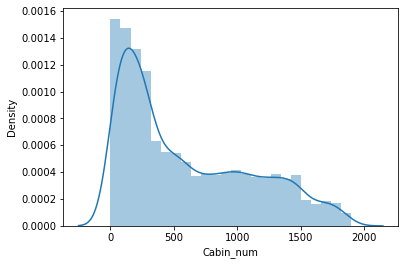

In [68]:
sns.distplot(df.Cabin_num)

In [69]:
df.Cabin_num.nunique()

1817

In [70]:
df.drop(columns='Cabin_num', inplace=True)
df_test.drop(columns='Cabin_num', inplace=True)

In [71]:
import numpy as np
# Sütundaki null değerleri say
null_count = df['Cabin_deck'].isnull().sum()

# En çok tekrar eden ilk ve ikinci değerleri belirle
most_common_values = df['Cabin_deck'].value_counts().index[:2].tolist()

# Null değerlerin yarısını en çok tekrar eden ilk değerle, diğer yarısını ise en çok tekrar eden ikinci değerle doldur
df['Cabin_deck'].fillna({i: np.random.choice(most_common_values, p=[0.5, 0.5]) for i in df.index[df['Cabin_deck'].isnull()].tolist()[:null_count//2] + 
                        df.index[df['Cabin_deck'].isnull()].tolist()[null_count//2:]}, inplace=True)

In [72]:
# Sütundaki null değerleri say
null_count = df_test['Cabin_deck'].isnull().sum()

# En çok tekrar eden ilk ve ikinci değerleri belirle
most_common_values = df_test['Cabin_deck'].value_counts().index[:2].tolist()

# Null değerlerin yarısını en çok tekrar eden ilk değerle, diğer yarısını ise en çok tekrar eden ikinci değerle doldur
df_test['Cabin_deck'].fillna({i: np.random.choice(most_common_values, p=[0.5, 0.5]) for i in df_test.index[df_test['Cabin_deck'].isnull()].tolist()[
    :null_count//2] + df_test.index[df_test['Cabin_deck'].isnull()].tolist()[null_count//2:]}, inplace=True)

In [73]:
df.Cabin_deck.value_counts()

F    2900
G    2652
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin_deck, dtype: int64

In [149]:
mapping_cabin_d = {'A': 1, 'B': 2, 'C': 2,'D': 2, 'E': 3, 'F': 4,'G':5,'T':6}

# replace() metodunu kullanarak değişikliği uyguluyoruz
df['Cabin_deck'] = df['Cabin_deck'].replace(mapping_cabin_d)
df_test['Cabin_deck'] = df_test['Cabin_deck'].replace(mapping_cabin_d)

df_test['Cabin_deck'] = df_test['Cabin_deck'].astype(int)
df['Cabin_deck'] = df['Cabin_deck'].astype(int)

In [150]:
df.Cabin_side.value_counts()

S    4288
P    4206
Name: Cabin_side, dtype: int64

In [151]:
# Sütundaki null değerleri say
null_count = df['Cabin_side'].isnull().sum()

# En çok tekrar eden ilk ve ikinci değerleri belirle
most_common_values = df['Cabin_side'].value_counts().index[:2].tolist()

# Null değerlerin yarısını en çok tekrar eden ilk değerle, diğer yarısını ise en çok tekrar eden ikinci değerle doldur
df['Cabin_side'].fillna({i: np.random.choice(most_common_values, p=[0.5, 0.5]) for i in df.index[df['Cabin_side'].isnull()].tolist()[:null_count//2] + 
                        df.index[df['Cabin_side'].isnull()].tolist()[null_count//2:]}, inplace=True)

In [152]:
null_count = df_test['Cabin_side'].isnull().sum()

# En çok tekrar eden ilk ve ikinci değerleri belirle
most_common_values = df_test['Cabin_side'].value_counts().index[:2].tolist()

# Null değerlerin yarısını en çok tekrar eden ilk değerle, diğer yarısını ise en çok tekrar eden ikinci değerle doldur
df_test['Cabin_side'].fillna({i: np.random.choice(most_common_values, p=[0.5, 0.5]) for i in df_test.index[df_test['Cabin_side'].isnull()].tolist()[
    :null_count//2] + df_test.index[df_test['Cabin_side'].isnull()].tolist()[null_count//2:]}, inplace=True)

In [153]:
df.Cabin_side.value_counts()

S    4383
P    4310
Name: Cabin_side, dtype: int64

In [154]:
'''
S:1
P:0
'''

df['Cabin_side'] = df['Cabin_side'].replace({'S': 1, 'P': 0})
df_test['Cabin_side'] = df_test['Cabin_side'].replace({'S': 1, 'P': 0})
df['Cabin_side'] = df['Cabin_side'].astype(int)
df_test['Cabin_side'] = df_test['Cabin_side'].astype(int)

In [155]:
df.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [156]:
df_test.Destination.value_counts()

TRAPPIST-1e      2956
55 Cancri e       841
PSO J318.5-22     388
Name: Destination, dtype: int64

In [157]:
df['Destination'].fillna(value='TRAPPIST-1e', limit=int(5915*182/8692), inplace=True)
df['Destination'].fillna(value='55 Cancri e', limit=int(1800*182/8692), inplace=True)
df['Destination'].fillna(value='PSO J318.5-22', limit=int(796*192/8692), inplace=True)

# Kalan null değerleri veri setinin moduyla dolduralım
df['Destination'].fillna(df['Destination'].mode()[0], inplace=True)

In [158]:
df_test['Destination'].fillna(value='TRAPPIST-1e', limit=int(2956*92/4277), inplace=True)
df_test['Destination'].fillna(value='55 Cancri e', limit=int(841*92/4277), inplace=True)
df_test['Destination'].fillna(value='PSO J318.5-22', limit=int(388*92/4277), inplace=True)

# Kalan null değerleri veri setinin moduyla dolduralım
df_test['Destination'].fillna(df_test['Destination'].mode()[0], inplace=True)

In [159]:
df = pd.get_dummies(df, columns = ["Destination"])
df_test = pd.get_dummies(df_test, columns = ["Destination"])

In [160]:
df["Age"].fillna(df.Age.mean(), inplace=True)
df_test["Age"].fillna(df.Age.mean(), inplace=True)

In [161]:
from sklearn import preprocessing

<AxesSubplot:ylabel='Density'>

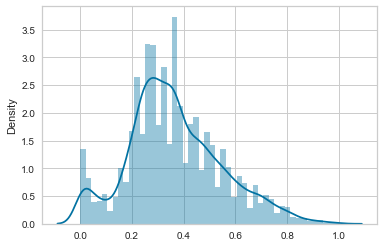

In [162]:
sns.distplot(preprocessing.minmax_scale(df.Age))

In [163]:
df["Age"]=preprocessing.minmax_scale(df.Age)
df_test["Age"]=preprocessing.minmax_scale(df_test.Age)

In [164]:
df_test.VIP.value_counts()

False    4110
True       74
Name: VIP, dtype: int64

In [165]:
df['VIP'].fillna(value='False', limit=int(8291*203/8692), inplace=True)
df['VIP'].fillna(value='True', limit=int(199*203/8692), inplace=True)

# Kalan null değerleri veri setinin moduyla dolduralım
df['VIP'].fillna(df['VIP'].mode()[0], inplace=True)

In [166]:
df_test['VIP'].fillna(value='False', limit=int(4110*93/4277), inplace=True)
df_test['VIP'].fillna(value='True', limit=int(74*93/4277), inplace=True)

# Kalan null değerleri veri setinin moduyla dolduralım
df_test['VIP'].fillna(df_test['VIP'].mode()[0], inplace=True)

In [168]:
df["RoomService"].fillna(df.RoomService.mean(), inplace=True)
df_test["RoomService"].fillna(df.RoomService.mean(), inplace=True)

<AxesSubplot:ylabel='Density'>

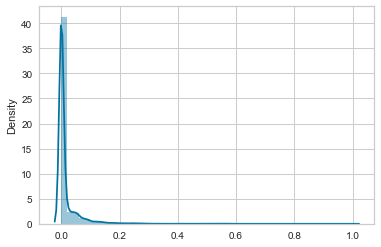

In [169]:
sns.distplot(preprocessing.minmax_scale(df.RoomService))

In [170]:
df["RoomService"]=preprocessing.minmax_scale(df.RoomService)
df_test["RoomService"]=preprocessing.minmax_scale(df_test.RoomService)

In [171]:
df["FoodCourt"].fillna(df.FoodCourt.mean(), inplace=True)
df_test["FoodCourt"].fillna(df.FoodCourt.mean(), inplace=True)

df["FoodCourt"]=preprocessing.minmax_scale(df.FoodCourt)
df_test["FoodCourt"]=preprocessing.minmax_scale(df_test.FoodCourt)

<AxesSubplot:xlabel='FoodCourt', ylabel='Density'>

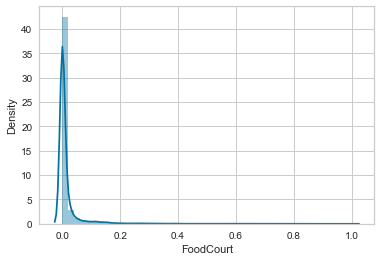

In [172]:
sns.distplot(df.FoodCourt)

In [173]:
df["ShoppingMall"].fillna(df.ShoppingMall.mean(), inplace=True)
df_test["ShoppingMall"].fillna(df.ShoppingMall.mean(), inplace=True)

df["ShoppingMall"]=preprocessing.minmax_scale(df.ShoppingMall)
df_test["ShoppingMall"]=preprocessing.minmax_scale(df_test.ShoppingMall)

<AxesSubplot:xlabel='ShoppingMall', ylabel='Density'>

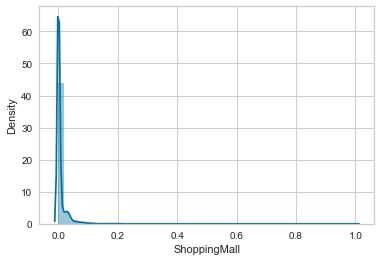

In [174]:
sns.distplot(df.ShoppingMall)

In [175]:
df["Spa"].fillna(df.Spa.mean(), inplace=True)
df_test["Spa"].fillna(df.Spa.mean(), inplace=True)

df["Spa"]=preprocessing.minmax_scale(df.Spa)
df_test["Spa"]=preprocessing.minmax_scale(df_test.Spa)

<AxesSubplot:xlabel='Spa', ylabel='Density'>

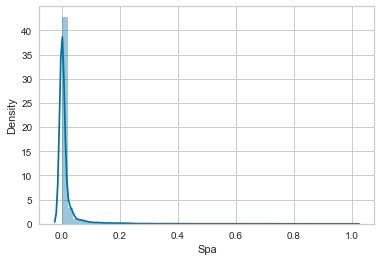

In [176]:
sns.distplot(df.Spa)

In [177]:
df["VRDeck"].fillna(df.VRDeck.mean(), inplace=True)
df_test["VRDeck"].fillna(df.VRDeck.mean(), inplace=True)

df["VRDeck"]=preprocessing.minmax_scale(df.VRDeck)
df_test["VRDeck"]=preprocessing.minmax_scale(df_test.VRDeck)

In [179]:
df['Transported'] = df['Transported'].replace({'True': 1, 'False': 0})

df['Transported'] = df['Transported'].astype(int)


In [180]:
from sklearn.preprocessing import Normalizer





normalizer = Normalizer()
df[['Age', 'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = normalizer.fit_transform(df[[
    'Age', 'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])

In [181]:
df_test[['Age', 'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = normalizer.fit_transform(df_test[[
    'Age', 'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])

In [184]:
from pycaret.classification import setup
clf = setup(df.drop(columns=['Name','PassengerId']), target='Transported', preprocess=False)
from pycaret.classification import compare_models
models = compare_models()

,Description,Value
0,Session id,624
1,Target,Transported
2,Target type,Binary
3,Original data shape,"(8693, 17)"
4,Transformed data shape,"(8693, 17)"
5,Transformed train set shape,"(6085, 17)"
6,Transformed test set shape,"(2608, 17)"
7,Numeric features,16


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8051,0.8870,0.8215,0.7979,0.8094,0.6101,0.6105,1.2740
lightgbm,Light Gradient Boosting Machine,0.8031,0.8818,0.8245,0.7930,0.8083,0.6061,0.6067,0.7000
gbc,Gradient Boosting Classifier,0.7990,0.8789,0.8235,0.7873,0.8049,0.5979,0.5986,0.7520
rf,Random Forest Classifier,0.7964,0.8782,0.8081,0.7922,0.8000,0.5927,0.5930,0.6720
xgboost,Extreme Gradient Boosting,0.7952,0.8761,0.8134,0.7875,0.8001,0.5903,0.5909,0.6820
et,Extra Trees Classifier,0.7888,0.8678,0.8010,0.7845,0.7926,0.5776,0.5778,0.6670
ada,Ada Boost Classifier,0.7869,0.8657,0.7984,0.7831,0.7905,0.5736,0.5740,0.6810
svm,SVM - Linear Kernel,0.7845,0.0000,0.7566,0.8072,0.7788,0.5693,0.5734,0.5980
lr,Logistic Regression,0.7781,0.8639,0.7403,0.8040,0.7706,0.5565,0.5586,0.6050
lda,Linear Discriminant Analysis,0.7768,0.8636,0.7292,0.8091,0.7669,0.5540,0.5569,0.5800


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [211]:
from pycaret.classification import *
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8079,0.8737,0.8339,0.7950,0.8140,0.6156,0.6163
1,0.8144,0.8894,0.8534,0.7939,0.8226,0.6286,0.6304
2,0.7882,0.8778,0.8274,0.7697,0.7975,0.5761,0.5777
3,0.8309,0.9019,0.8567,0.8168,0.8362,0.6616,0.6624
4,0.7898,0.8781,0.8111,0.7806,0.7955,0.5795,0.5799
5,0.7697,0.8620,0.7876,0.7627,0.7749,0.5394,0.5396
6,0.8010,0.8771,0.8039,0.8013,0.8026,0.6019,0.6020
7,0.8372,0.9038,0.8497,0.8307,0.8401,0.6743,0.6745
8,0.7993,0.8723,0.8137,0.7930,0.8032,0.5986,0.5988


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [212]:
from pycaret.classification import predict_model
predicts=predict_model(lightgbm, data=df_test.drop(columns=['PassengerId','Name']))
predicts = predicts.rename(columns={'prediction_label': 'Transported'})
predicts

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Cabin_deck,Cabin_side,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Transported,prediction_score
0,1,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,5,1,0,0,1,1,0.6999
1,0,0.860703,0,0.000000,0.001274,0.000000,0.509106,0.000000,1,0,0,4,1,0,0,1,0,0.9871
2,0,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,2,1,1,0,0,1,0.9897
3,0,0.876129,0,0.000000,0.479410,0.000000,0.016613,0.047842,0,1,0,2,1,0,0,1,1,0.9586
4,0,0.957163,0,0.003269,0.000000,0.289532,0.000000,0.000000,1,0,0,4,1,0,0,1,1,0.9314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,5,1,0,0,1,1,0.6999
4273,0,0.997938,0,0.000000,0.062908,0.003848,0.000946,0.012136,1,0,0,4,0,0,0,1,0,0.6387
4274,0,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,2,0,1,0,0,1,0.6419
4275,0,0.958447,0,0.000000,0.278522,0.000000,0.000000,0.061677,0,1,0,2,0,0,0,1,1,0.7694


In [213]:
predicts["PassengerId"]=df_test["PassengerId"]
submission=predicts[["PassengerId","Transported"]]
submission['Transported'] = submission['Transported'].replace({1: 'True', 0: 'False'})
df['Transported'] = df['Transported'].astype(str)

In [214]:
submission.to_csv('submission_pycaretlgbm_norm.csv', index=False)

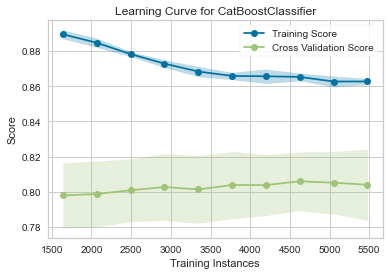

In [191]:
plot_model(catboost, plot='learning')

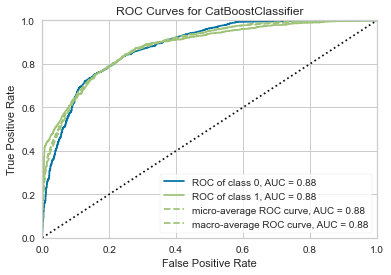

In [192]:
plot_model(catboost, plot='auc')

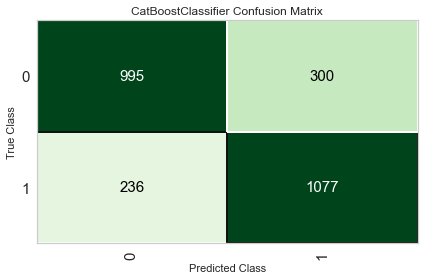

In [193]:
plot_model(catboost, plot='confusion_matrix')

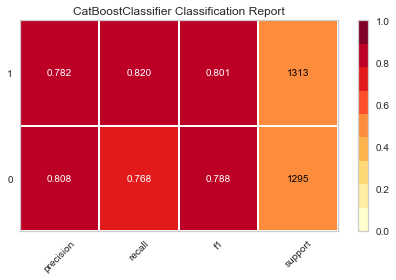

In [194]:
plot_model(catboost, plot='class_report')

In [195]:
catboost_regular_norm = create_model('catboost', 
                        fold = 10,
                        verbose = False,
                        l2_leaf_reg = 3)

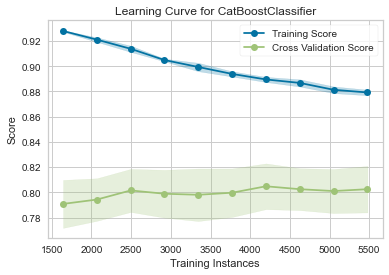

In [196]:
plot_model(catboost_regular_norm, plot='learning')

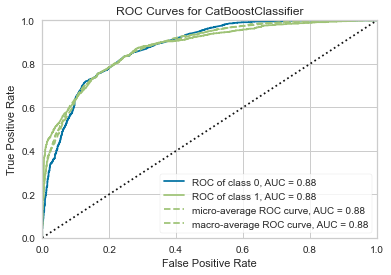

In [197]:
plot_model(catboost_regular_norm, plot='auc')

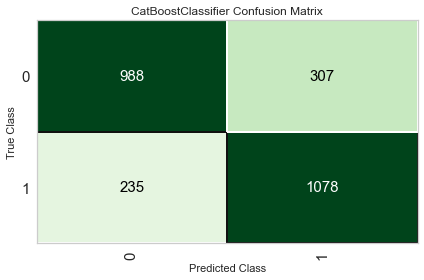

In [198]:
plot_model(catboost_regular_norm, plot='confusion_matrix')

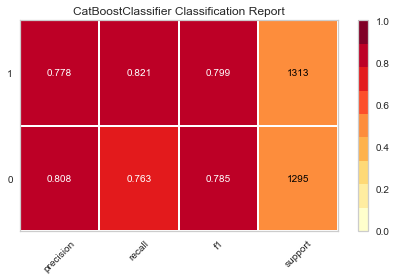

In [199]:
plot_model(catboost_regular_norm, plot='class_report')

In [200]:
predicts=predict_model(catboost_regular_norm, data=df_test.drop(columns=['PassengerId','Name']))
predicts = predicts.rename(columns={'prediction_label': 'Transported'})
predicts

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Cabin_deck,Cabin_side,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Transported,prediction_score
0,1,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,5,1,0,0,1,1,0.7008
1,0,0.860703,0,0.000000,0.001274,0.000000,0.509106,0.000000,1,0,0,4,1,0,0,1,0,0.9907
2,0,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,2,1,1,0,0,1,0.9719
3,0,0.876129,0,0.000000,0.479410,0.000000,0.016613,0.047842,0,1,0,2,1,0,0,1,1,0.9785
4,0,0.957163,0,0.003269,0.000000,0.289532,0.000000,0.000000,1,0,0,4,1,0,0,1,1,0.9508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,5,1,0,0,1,1,0.7008
4273,0,0.997938,0,0.000000,0.062908,0.003848,0.000946,0.012136,1,0,0,4,0,0,0,1,0,0.5409
4274,0,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,2,0,1,0,0,1,0.6134
4275,0,0.958447,0,0.000000,0.278522,0.000000,0.000000,0.061677,0,1,0,2,0,0,0,1,1,0.8343


In [201]:
predicts["PassengerId"]=df_test["PassengerId"]
submission=predicts[["PassengerId","Transported"]]
submission['Transported'] = submission['Transported'].replace({1: 'True', 0: 'False'})
df['Transported'] = df['Transported'].astype(str)

In [202]:
submission.to_csv('submission_pycaretcat_regularnorm3.csv', index=False)

In [205]:
catboost_regular_tuned = tune_model(catboost_regular_norm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8161,0.8818,0.8339,0.8076,0.8205,0.6321,0.6324
1,0.8128,0.8892,0.8567,0.7898,0.8219,0.6253,0.6276
2,0.7947,0.8812,0.8274,0.7791,0.8025,0.5893,0.5904
3,0.8292,0.9020,0.8599,0.8123,0.8354,0.6583,0.6594
4,0.7915,0.8736,0.8208,0.7778,0.7987,0.5827,0.5836
5,0.7681,0.8721,0.8170,0.7463,0.7800,0.5359,0.5383
6,0.7961,0.8791,0.8039,0.7935,0.7987,0.5921,0.5921
7,0.8355,0.9122,0.8431,0.8323,0.8377,0.6710,0.6711
8,0.7944,0.8801,0.8203,0.7819,0.8006,0.5887,0.5894


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [204]:
plot_model(catboost_regular_tuned, plot='learning')

NameError: name 'catboost_regular_tuned' is not defined

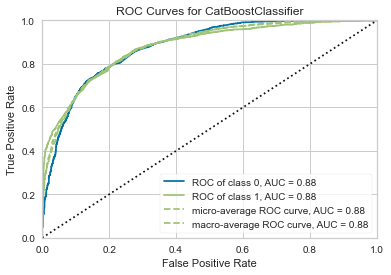

In [206]:
plot_model(catboost_regular_tuned, plot='auc')

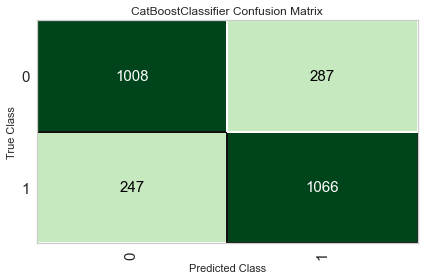

In [207]:
plot_model(catboost_regular_tuned, plot='confusion_matrix')

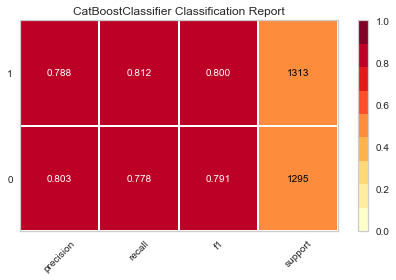

In [208]:
plot_model(catboost_regular_tuned, plot='class_report')

In [209]:
predicts=predict_model(catboost_regular_tuned, data=df_test.drop(columns=['PassengerId','Name']))
predicts = predicts.rename(columns={'prediction_label': 'Transported'})
predicts

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Cabin_deck,Cabin_side,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Transported,prediction_score
0,1,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,5,1,0,0,1,1,0.7155
1,0,0.860703,0,0.000000,0.001274,0.000000,0.509106,0.000000,1,0,0,4,1,0,0,1,0,0.9862
2,0,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,2,1,1,0,0,1,0.9454
3,0,0.876129,0,0.000000,0.479410,0.000000,0.016613,0.047842,0,1,0,2,1,0,0,1,1,0.9687
4,0,0.957163,0,0.003269,0.000000,0.289532,0.000000,0.000000,1,0,0,4,1,0,0,1,1,0.8957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,5,1,0,0,1,1,0.7155
4273,0,0.997938,0,0.000000,0.062908,0.003848,0.000946,0.012136,1,0,0,4,0,0,0,1,0,0.6138
4274,0,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,2,0,1,0,0,1,0.5691
4275,0,0.958447,0,0.000000,0.278522,0.000000,0.000000,0.061677,0,1,0,2,0,0,0,1,1,0.7810


In [210]:
submission.to_csv('submission_pycaretcat_tuned_regular3.csv', index=False)